<a href="https://colab.research.google.com/github/lostaim/MachineLearning/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns

In [ ]:
def estimate_coef(x,y):
  n = np.size(x);
  m_x = np.mean(x);
  m_y = np.mean(y);
  ss_xy = np.sum(y*x) - n*m_y*m_x
  ss_xx = np.sum(x*x) - n*m_x*m_x

  b_1 = ss_xy / ss_xx
  b_0 = m_y - b_1*m_x

  return(b_0, b_1)

def plot_reg(x,y,b):
  mtp.scatter(x,y,color='m', marker = 'o', s=30)
  y_pred = b[0] + b[1]*x
  mtp.plot(x, y_pred, color = 'g')
  mtp.xlabel('x')
  mtp.ylabel('y')

  mtp.show()

def main():
  x = np.array([0,10,2,30,4,50,6,70,80])
  y = np.array([0,1,20,3,40,5,60,7,8])

  b = estimate_coef(x,y);
  print("estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0],b[1]))

  plot_reg(x,y,b)

if __name__ == "__main__":
  main()


ridge regression-
the cost function in ridge regression adds up an additional parameter called as  λ * (slope)2,penalty.therefore the cost function returns cost function.
->when there is a unit change in x  variable which result in a higher unit change in y var. 
->we penalise the feature to get the best fit line.
the lambda value can range from 0 to any positive value.
when we have multiple features the cost function for ridge reggresion becomes 
(ading multiple penalties).

lasso regression-
->add λ * |slope| to cost function
in lasso regression the line moves in any lower value slope whereas in ridge regeression the line moves towards zero .
in lasso regeression the variables with lower scope values are removed/eliminated, ridge regression will never reach zero or eliminiate variables.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


df = load_boston()
dataset= pd.DataFrame(df.data)
df.target.shape
dataset["Price"]=df.target
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,:-1]

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)


ridge=Ridge()
parameters={'alpha':[1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print("\n")
print("ridge regression")
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print("\n")
print("lasso regression")
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
'''

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

-9.675731633390693e-26


ridge regression
{'alpha': 1}
-0.00015586935799189833


lasso regression
{'alpha': 1e-08}
-1.3381973654965102e-07


'\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\n'

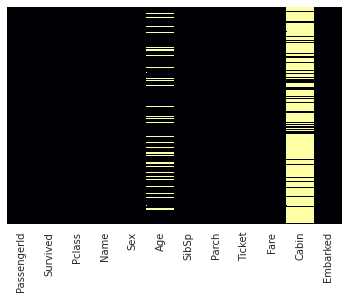

In [38]:
train = pd.read_csv('titanic_train.csv')
train.head()
train.isnull()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='inferno')


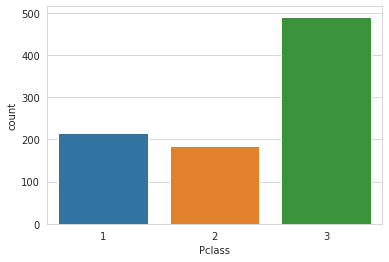

In [39]:
sns.set_style('whitegrid')
sns.countplot(x="Pclass",data=train)

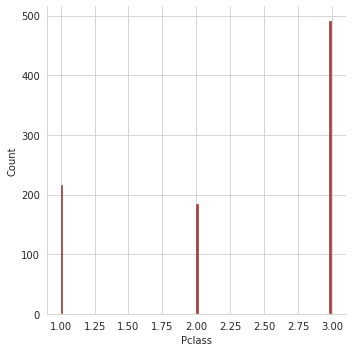

In [49]:
sns.displot(train['Pclass'].dropna(),kde=False,color='darkred',bins=100)